<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoUB.jpeg"></img>
<center>
<p>
<h1>Algorísmica Avançada</h1>
<h2>Práctica 2 - Programación dinámica </h2>
</center>
</p>
</div>

In [9]:
data_item = ['map', 'compass', 'water', 'sandwich', 'glucose', 'tin', 'banana',
             'apple', 'cheese', 'beer', 'suntan', 'camera', 'T', 'trousers',
             'umbrella', 'w t', 'w o', 'note-case', 'sunglasses', 'towel',
             'socks', 'book']
data_weight = [9, 13, 153, 50, 15, 68, 27, 39, 23, 52, 11, 32, 24, 48, 73, 42,
               43, 22, 7, 18, 4, 30]
data_value = [150, 35, 200, 160, 60, 45, 60, 40, 30, 10, 70, 30, 15, 10, 40,
              70, 75, 80, 20, 12, 50, 10]
data_sorted = sorted(zip(data_item, data_weight, data_value),
                     key=lambda (i, w, v): v//w, reverse=True)

max_weight = 400


class State(object):
    def __init__(self, level, benefit, weight, token):
        # token = list marking if a task is token. ex. [1, 0, 0] means
        # item0 token, item1 non-token, item2 non-token
        # available = list marking all tasks available, i.e. not explored yet
        self.level = level
        self.benefit = benefit
        self.weight = weight
        self.token = token
        self.available = self.token[:self.level]+[1]*(len(data_sorted)-level)
        self.ub = self.upperbound()

    def upperbound(self):  # define upperbound using fractional knaksack
        upperbound = 0  # initial upperbound
        # accumulated weight used to stop the upperbound summation
        weight_accumulate = 0
        for avail, (_, wei, val) in zip(self.available, data_sorted):
            if wei * avail <= max_weight - weight_accumulate:
                weight_accumulate += wei * avail
                upperbound += val * avail
            else:
                upperbound += val * (max_weight - weight_accumulate) / wei * avail
                break
        return upperbound

    def develop(self):
        level = self.level + 1
        _, weight, value = data_sorted[self.level]
        left_weight = self.weight + weight
        if left_weight <= max_weight:  # if not overweighted, give left child
            left_benefit = self.benefit + value
            left_token = self.token[:self.level]+[1]+self.token[level:]
            left_child = State(level, left_benefit, left_weight, left_token)
        else:
            left_child = None
        # anyway, give right child
        right_child = State(level, self.benefit, self.weight, self.token)
        return ([] if left_child is None else [left_child]) + [right_child]


Root = State(0, 0, 0, [0] * len(data_sorted))  # start with nothing
waiting_States = []  # list of States waiting to be explored
current_state = Root
while current_state.level < len(data_sorted):
    waiting_States.extend(current_state.develop())
    # sort the waiting list based on their upperbound
    waiting_States.sort(key=lambda x: x.ub)
    # explore the one with largest upperbound
    current_state = waiting_States.pop()
best_item = [item for tok, (item, _, _)
             in zip(current_state.token, data_sorted) if tok == 1]

print "Total weight: ", current_state.weight
print "Total Value: ", current_state.benefit
print "Items:", best_item

Total weight:  400
Total Value:  1110
Items: ['cheese', 'map', 'socks', 'suntan', 'glucose', 'sandwich', 'note-case', 'compass', 'banana', 'sunglasses', 'water', 'w t', 'w o']


<div class="alert alert-info">
<center>
  <h1>Introducción</h1>
</center>

En esta práctica de una única sesión implementaremos un algoritmo de programación dinámica, Dynamic Time Warping (DTW), para encontrar el matching "óptimo" de un vector de reales de entrada dentro de un vector de posible longitud "infinita" minimizando un criterio de distancia.

Como se ha comentado en clase de teoría, los algoritmos de programación dinámica definen una función de coste que se aplica sobre un conjunto de subproblemas (más fáciles de resolver que la solución global), de tal forma que la solución en una nueva iteración está compuesta de soluciones óptimas parciales, asegurando la optimalidad de la solución final. 

<div class="alert alert-info">
<center>
  <h1>Contenido</h1>
  </center><p>




<div class="alert alert-success" style="width:90%; margin:0 auto;">
  <h2><p>DTW</p></h2>
  
  <div class="row">
  <div>
  <p style="text-align: justify; padding-right: 30px">
  Implementa el algoritmo DTW presentado en clase de teoría. Para ello, las entradas serán 2 vectores, el patron a buscar, y el vector donde encontrar el patrón. Usaremos valores reales en cada posición del vector, que hipotéticamente representarán valores de un sensor inercial situado en la muñeca de un usuario que realiza gestos con el objetivo de interaccionar con una interfaz. El código debe implementar DTW de tal forma que la salida sea, el coste de la asociación más factible, mostrando la posición de inicio-fin dentro del segundo vector.
  </p>
  </div>


<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Código </h3></p> </center> 

<p>
<h3>INPUT</h3>
<ul>
<li>V1: vector patrón.</li>
<li>V2: vector sobre el cual encontrar el inicio-fin más factible de V1.</li>
</ul>
<br>
<h3>OUTPUT</h3>
El coste de la asociación más factible, mostrando la posición de inicio-fin dentro del segundo vector.
</p>

</div>

In [15]:
#Llibreria numpy, per treballar amb matrius, a mi em va millor
get_ipython().magic(u'pylab inline')

#Em molesta que surtin tants decimals, aixi que aixo els redueix
np.set_printoptions(formatter={'float': lambda x: "{0:0.0f}".format(x)})


Populating the interactive namespace from numpy and matplotlib


C:\Users\blair\Anaconda\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['cosh', 'ldexp', 'hypot', 'tan', 'isnan', 'log', 'fabs', 'floor', 'modf', 'sqrt', 'frexp', 'degrees', 'pi', 'log10', 'sin', 'fmod', 'copysign', 'expm1', 'ceil', 'isinf', 'sinh', 'trunc', 'cos', 'e', 'tanh', 'radians', 'exp', 'log1p', 'gamma']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [23]:
#Patró
v2 = np.array([1, 2, 3, 3, 5])
#Vector que hem captat
v1 = np.array([2, 3, 4, 5, 1, 2, 3,4,5,2,3,4,1,2,3,4,5,6,4,2,3,1,3])

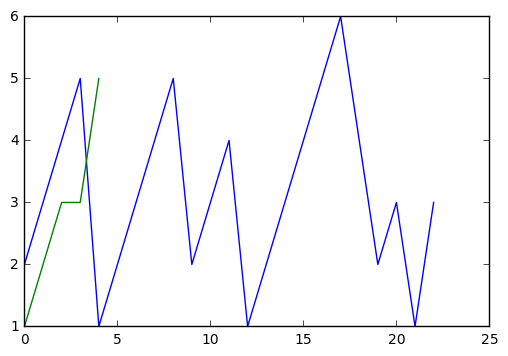

In [24]:
#Els dibuixem i veiem que les dos senyals tenen un comportament semblant
plot(v1)
plot(v2)

In [22]:

def DTW(x,y,treshold):

    distances = np.zeros((len(y), len(x))) 
    for i in range(len(y)):
        for j in range(len(x)):
            
            distances[i,j] = distancia_euclidiana(x[j],y[i])
    print "Matriu Euclidiana\n",distances

    col = len(x)-1
    for i in range(len(y)):

        if distances[i,col] < treshold:

            accumulated_cost = costAcumulat(distances,x,y,i)
            

            path, cost = path_cost(x,y,accumulated_cost,distances,i)
                        
            print "\nPath:\n",path, "\nCost:\n",cost
    
def distancia_euclidiana(x,y):
    return pow(abs(x-y),2)

def costAcumulat(distances,x,y,coordenada):
    j = len(x)-1
    
    accumulated_cost = np.zeros((len(y), len(x)))
    


    accumulated_cost[0,0] = distances[coordenada,0]
    

    
    for i in range(1, len(x)): #Cap a la dreta

        accumulated_cost[0,i] = distances[0,i] + accumulated_cost[0, i-1]
        
    for i in range(1, len(y)): #Cap a l'esquerra
        accumulated_cost[i,0] = distances[i,0]+accumulated_cost[i-j,0]

    for i in range(1, len(y)): #Diagonal
        for j in range(1, len(x)):
            accumulated_cost[i, j] = min(accumulated_cost[i-1, j-1],
                                         accumulated_cost[i-1, j], 
                                         accumulated_cost[i, j-1]) + distances[i, j]
    
    
    return accumulated_cost

def path_cost(x,y,accumulated_cost,distances,coordenada):
    
    
    path = [[len(x)-1, coordenada]]

    cost = 0
    i = len(y)-1
    j = len(x)-1
    while i>0 and j>0:
        if i==0:
            j = j - 1
        elif j==0:
            i = i - 1
        else:
            if accumulated_cost[i-1, j] == min(accumulated_cost[i-1, j-1], accumulated_cost[i-1, j], accumulated_cost[i, j-1]):
                i = i - 1
            elif accumulated_cost[i, j-1] == min(accumulated_cost[i-1, j-1], accumulated_cost[i-1, j], accumulated_cost[i, j-1]):
                j = j-1
            else:
                i = i - 1
                j= j- 1
        path.append([j, i])
        
    path.append([0,0])
    path.append([0,0])
    for [y, x] in path:
        cost = cost +distances[x, y]
    return path, cost    


DTW(v2,v1,1)

Matriu Euclidiana
[[0 1 4 4 9 16 9 4 4 1 0]
 [1 0 1 1 4 9 4 1 1 0 1]
 [4 1 0 0 1 4 1 0 0 1 4]
 [9 4 1 1 0 1 0 1 1 4 9]
 [16 9 4 4 1 0 1 4 4 9 16]
 [25 16 9 9 4 1 4 9 9 16 25]
 [36 25 16 16 9 4 9 16 16 25 36]
 [49 36 25 25 16 9 16 25 25 36 49]
 [64 49 36 36 25 16 25 36 36 49 64]
 [81 64 49 49 36 25 36 49 49 64 81]
 [25 16 9 9 4 1 4 9 9 16 25]
 [36 25 16 16 9 4 9 16 16 25 36]
 [64 49 36 36 25 16 25 36 36 49 64]
 [9 4 1 1 0 1 0 1 1 4 9]
 [25 16 9 9 4 1 4 9 9 16 25]
 [64 49 36 36 25 16 25 36 36 49 64]
 [4 1 0 0 1 4 1 0 0 1 4]
 [1 0 1 1 4 9 4 1 1 0 1]
 [0 1 4 4 9 16 9 4 4 1 0]]

Path:
[[10, 0], [9, 17], [8, 16], [7, 16], [6, 16], [5, 15], [5, 14], [4, 13], [3, 13], [2, 13], [1, 13], [0, 13], [0, 0], [0, 0]] 
Cost:
33.0

Path:
[[10, 18], [9, 17], [8, 16], [7, 16], [6, 16], [5, 15], [5, 14], [4, 13], [3, 13], [2, 13], [1, 13], [0, 13], [0, 0], [0, 0]] 
Cost:
33.0


In [ ]:
def path(x,y,distances):
    
    print accumulated_cost
path(x,y,distances)

In [ ]:
def dtwDistance(x,y):
    
    infinity=99999999999

    
    llistaXY = []
    
    #llistaXY = [[0 for col in range(len(y)+1)] for fila in range(len(x)+1)]
    
    llistaXY = zeros((len(x)+1,len(y)+1))

    llistaXY[0,1:] = 0

    llistaXY[1:,0] = 0
    
    matriuNoInf = llistaXY[1:,1:]
    
    for i in range(len(x)):
        for j in range(len(y)):
            matriuNoInf[i,j] = (x[i]-y[j])**2  
    
    copia = matriuNoInf.copy()
    
    for i in range(len(x)):
        for j in range(len(y)):
            
            matriuNoInf[i,j] += min(llistaXY[i,j], llistaXY[i,j+1],llistaXY[i+1,j])
    print matriuNoInf
    print matriuNoInf[-1,-1]
    print matriuNoInf.shape
    print sum(matriuNoInf.shape)
    return matriuNoInf[-1,-1] / sum(matriuNoInf.shape)


    

dtwDistance(v1,v2)

In [ ]:
def DTW(V1,V2):
    coste=0
    inicio=0
    fin=0
    
    return (coste, inicio, fin)

<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Comentarios </h3></p> </center> 

</div>

### En esta sección debéis responder a las preguntas siguientes:
#### 1. Implementar un juego de test y justificar los resultados
#### 2. Análisis de complejidad de vuestra implementación

<div class="alert alert-info">
<center>
  <h1>Entrega</h1>
</center>
<p>
La entrega de esta práctica tiene como fecha límite el **domingo, 25 de diciembre de 2016 a las 23:55**. En el campus virtual deberéis subir este fichero con las funciones implementadas y las secciones de comentarios debidamente rellenadas.
</p>

<p>
Este fichero es la parte 1/2 de la segunda entrega, correspondiente a algoritmos de programación dinámica.
</p>

<p>
La entrega tiene que consistir en un solo fichero **.ipynb** con el nombre: AA\_*Apellido1Apellido2*_*Nombre*_dp1.ipyn
</p>

In [ ]:
from numpy import array, zeros, argmin, inf

def dtw(x, y, dist):
    """
    Computes Dynamic Time Warping (DTW) of two sequences.
    :param array x: N1*M array
    :param array y: N2*M array
    :param func dist: distance used as cost measure
    Returns the minimum distance, the cost matrix, the accumulated cost matrix, and the wrap path.
    """
    assert len(x)
    assert len(y)
    r, c = len(x), len(y)
    D0 = zeros((r + 1, c + 1))

    D0[0, 1:] = 0
    D0[1:, 0] = 0
    print D0
    D1 = D0[1:, 1:] # view
    print D1
    for i in range(r):
        for j in range(c):
            D1[i, j] = dist(x[i], y[j])
    C = D1.copy()
    for i in range(r):
        for j in range(c):
            D1[i, j] += min(D0[i, j], D0[i, j+1], D0[i+1, j])
    if len(x)==1:
        path = zeros(len(y)), range(len(y))
    elif len(y) == 1:
        path = range(len(x)), zeros(len(x))
    else:
        path = _traceback(D0)
    
    print D1
    return D1[-1, -1] / sum(D1.shape), C, D1, path

def _traceback(D):
    i, j = array(D.shape) - 2
    p, q = [i], [j]
    while ((i > 0) or (j > 0)):
        tb = argmin((D[i, j], D[i, j+1], D[i+1, j]))
        if (tb == 0):
            i -= 1
            j -= 1
        elif (tb == 1):
            i -= 1
        else: # (tb == 2):
            j -= 1
        p.insert(0, i)
        q.insert(0, j)
    return array(p), array(q)

if __name__ == '__main__':
    if 0: # 1-D numeric
        from sklearn.metrics.pairwise import manhattan_distances
        x = [0, 0, 1, 1, 2, 4, 2, 1, 2, 0]
        y = [1, 1, 1, 2, 2, 2, 2, 3, 2, 0]
        dist_fun = manhattan_distances
    elif 0: # 2-D numeric
        from sklearn.metrics.pairwise import euclidean_distances
        x = [[0, 0], [0, 1], [1, 1], [1, 2], [2, 2], [4, 3], [2, 3], [1, 1], [2, 2], [0, 1]]
        y = [[1, 0], [1, 1], [1, 1], [2, 1], [4, 3], [4, 3], [2, 3], [3, 1], [1, 2], [1, 0]]
        dist_fun = euclidean_distances
    else: # 1-D list of strings
        from nltk.metrics.distance import edit_distance
        #x = ['we', 'shelled', 'clams', 'for', 'the', 'chowder']
        #y = ['class', 'too']
        x = ['i', 'soon', 'found', 'myself', 'muttering', 'to', 'the', 'walls']
        y = ['see', 'drown', 'himself']
        #x = 'we talked about the situation'.split()
        #y = 'we talked about the situation'.split()
        dist_fun = edit_distance
    dist, cost, acc, path = dtw(x, y, dist_fun)

    # vizualize
    from matplotlib import pyplot as plt
    plt.imshow(cost.T, origin='lower', cmap=plt.cm.Reds, interpolation='nearest')
    plt.plot(path[0], path[1], '-o') # relation
    plt.xticks(range(len(x)), x)
    plt.yticks(range(len(y)), y)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axis('tight')
    plt.title('Minimum distance: {}'.format(dist))
    plt.show()

In [ ]:

def my_custom_norm(v1, v2):
    return (x * x) + (y * y)

dist, cost, acc, path = dtw(x, y, dist=my_custom_norm)

Total Distance is  34.0


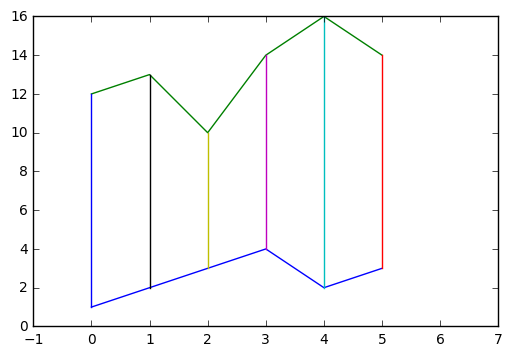

In [12]:


from math import *
import numpy as np
import sys

def DTW(A, B, window = sys.maxint, d = lambda x,y: abs(x-y)):
    # create the cost matrix
    A, B = np.array(A), np.array(B)
    M, N = len(A), len(B)
    cost = sys.maxint * np.ones((M, N))
    

    # initialize the first row and column
    cost[0, 0] = d(A[0], B[0])
    for i in range(1, M):
        cost[i, 0] = cost[i-1, 0] + d(A[i], B[0])

    for j in range(1, N):
        cost[0, j] = cost[0, j-1] + d(A[0], B[j])
    # fill in the rest of the matrix
    for i in range(1, M):
        for j in range(max(1, i - window), min(N, i + window)):
            choices = cost[i - 1, j - 1], cost[i, j-1], cost[i-1, j]
            cost[i, j] = min(choices) + d(A[i], B[j])

    # find the optimal path
    n, m = N - 1, M - 1
    path = []

    while (m, n) != (0, 0):
        path.append((m, n))
        m, n = min((m - 1, n), (m, n - 1), (m - 1, n - 1), key = lambda x: cost[x[0], x[1]])
    
    path.append((0,0))
    return cost[-1, -1], path

def main():
    A, B = np.array([1,2,3,4,2,3]), np.array([1,1,3,3,4,3,3])
    C = np.array([7,8,5,9,11,9])
    B = C
    cost, path = DTW(A, B, window = 4)
    print 'Total Distance is ', cost
    import matplotlib.pyplot as plt
    offset = 5
    plt.xlim([-1, max(len(A), len(B)) + 1])
    plt.plot(A)
    plt.plot(B + offset)
    for (x1, x2) in path:
        plt.plot([x1, x2], [A[x1], B[x2] + offset])
    plt.show()

if __name__ == '__main__':
    main()